# Overview

- Understand statistical signifcance of features
- Create Visualization to convery statistical significance

## Methods

## Data Import

In [20]:
import pandas as pd
pd.set_option("display.max_columns", 300)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stat

%matplotlib inline

In [2]:
clean_df = pd.read_csv(r"..\data\diabetic_data_preclean.csv", index_col=0)

In [3]:
clean_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,2
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,Ch,Yes,0


### Affect of number of medication on readmission 

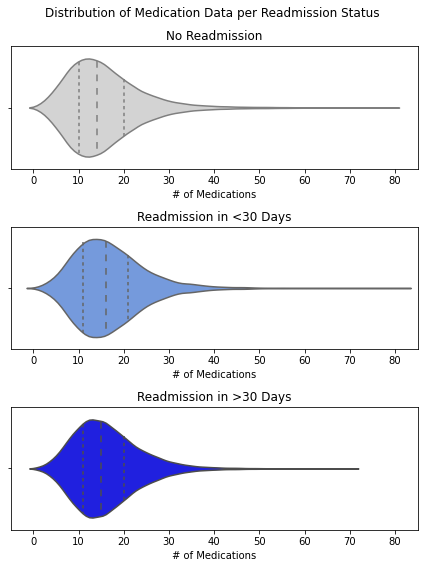

In [149]:
#set color?
sns.set_palette("rocket")
#data slice
x0 = clean_df[clean_df.readmitted == 0]["num_medications"]
x1 = clean_df[clean_df.readmitted == 1]["num_medications"]
x2 = clean_df[clean_df.readmitted == 2]["num_medications"]

#set subplots
fig, ax = plt.subplots(3,1, figsize=(6,8))
#subplot 1
sns.violinplot(x0, color="lightgrey", ax=ax[0], inner="quartile")
ax[0].set_title("No Readmission")
ax[0].set_xlim(-5,85)
ax[0].set_xlabel("# of Medications")

#subplot 2
sns.violinplot(x1, color="cornflowerblue", ax=ax[1], inner="quartile")
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-5,85)
ax[1].set_xlabel("# of Medications")

#subplot 3
sns.violinplot(x2, color="blue", ax=ax[2], inner="quartile")
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-5,85)
ax[2].set_xlabel("# of Medications")

#prettify
plt.suptitle("Distribution of Medication Data per Readmission Status")
plt.tight_layout(); #make it neat

#save
plt.savefig(r"..\image\num_med_violin.png");
plt.show();

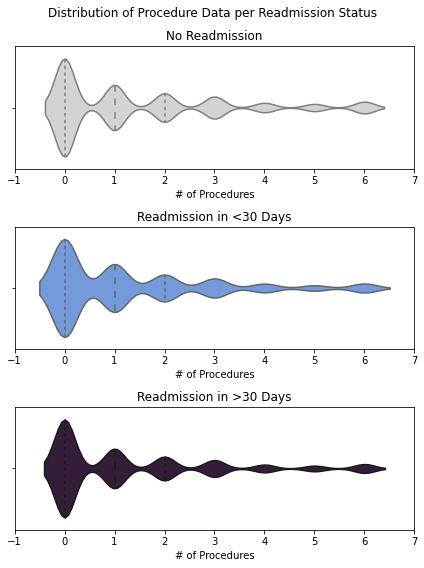

In [150]:
#data slice
x0 = clean_df[clean_df.readmitted == 0]["num_procedures"]
x1 = clean_df[clean_df.readmitted == 1]["num_procedures"]
x2 = clean_df[clean_df.readmitted == 2]["num_procedures"]

#plot
fig, ax = plt.subplots(3,1, figsize=(6,8))
#first subplot
sns.violinplot(x0, color="lightgrey" ,ax=ax[0], inner="quartile")
ax[0].set_title("No Readmission")
ax[0].set_xlim(-1,7)
ax[0].set_xlabel("# of Procedures")

#second subplot
sns.violinplot(x1, color="cornflowerblue", ax=ax[1], inner="quartile")
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-1,7)
ax[1].set_xlabel("# of Procedures")

#third subplot
sns.violinplot(x2, ccolor="blue", ax=ax[2], inner="quartile")
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-1,7)
ax[2].set_xlabel("# of Procedures")

#prettify
plt.suptitle("Distribution of Procedure Data per Readmission Status")
plt.tight_layout(); #make it neat

#save
plt.savefig(r"..\image\num_procedure_violin.png");
plt.show();

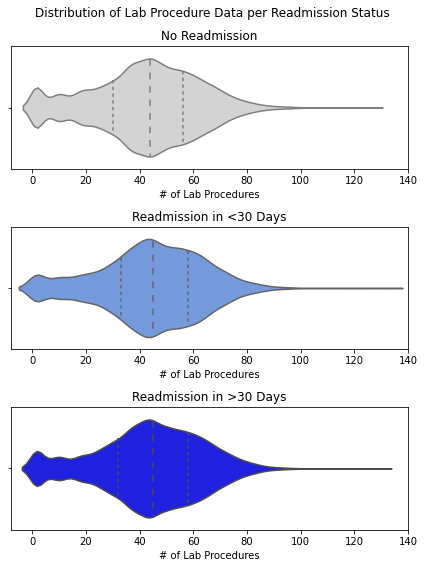

In [151]:
#data slice
x0 = clean_df[clean_df.readmitted == 0]["num_lab_procedures"]
x1 = clean_df[clean_df.readmitted == 1]["num_lab_procedures"]
x2 = clean_df[clean_df.readmitted == 2]["num_lab_procedures"]

#set subplot
fig, ax = plt.subplots(3,1, figsize=(6,8))
#subplot 1
sns.violinplot(x0, color="lightgrey", alpha=0.7, ax=ax[0], inner="quartile")
ax[0].set_title("No Readmission")
ax[0].set_xlim(-8, 140)
ax[0].set_xlabel("# of Lab Procedures")

#subplot 2
sns.violinplot(x1, color="cornflowerblue", alpha=0.7, ax=ax[1], inner="quartile")
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-8, 140)
ax[1].set_xlabel("# of Lab Procedures")

#subplot 3
sns.violinplot(x2, color="blue", alpha=0.7, ax=ax[2], inner="quartile")
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-8, 140)
ax[2].set_xlabel("# of Lab Procedures")

#prettify
plt.suptitle("Distribution of Lab Procedure Data per Readmission Status")
plt.tight_layout(); #make it neat

#save
plt.savefig(r"..\image\num_lab_procedure_violin.png");
plt.show();

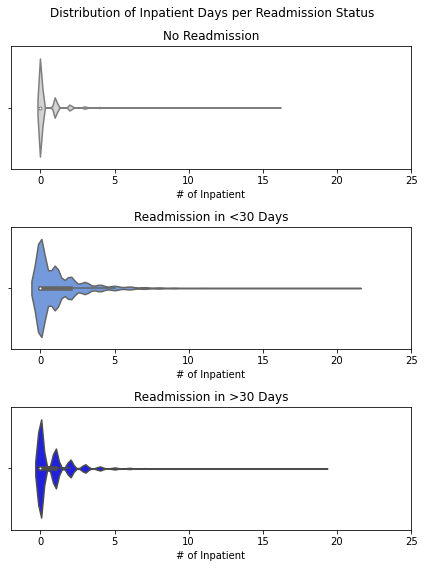

In [152]:
# data slice
x0 = clean_df[clean_df.readmitted == 0]["number_inpatient"]
x1 = clean_df[clean_df.readmitted == 1]["number_inpatient"]
x2 = clean_df[clean_df.readmitted == 2]["number_inpatient"]

# plot
fig, ax = plt.subplots(3,1, figsize=(6,8))
# subplot 1
sns.violinplot(x0, color="lightgrey", alpha=0.7, ax=ax[0])
ax[0].set_title("No Readmission")
ax[0].set_xlim(-2, 25)
ax[0].set_xlabel("# of Inpatient")

# subplot 2
sns.violinplot(x1, color="cornflowerblue", alpha=0.7, ax=ax[1])
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlim(-2, 25)
ax[1].set_xlabel("# of Inpatient")

# subplot 3
sns.violinplot(x2, color="blue", alpha=0.7, ax=ax[2])
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlim(-2, 25)
ax[2].set_xlabel("# of Inpatient")

# prettify
plt.suptitle("Distribution of Inpatient Days per Readmission Status")
plt.tight_layout(); #make it neat
# save
plt.savefig(r"..\image\num_inpatient_violin.png");
plt.show();

## Statistical Analysis on Select Features

alpha = 0.5 <br>

Selected Features = Number of Medication, Procedure, and Lab Procedures <Br>

Null Hypothesis: Selected Features are not significant factors determining readmission. <br>
Alternative Hypothesis: Selected Features are significant factors determining readmission. <br>

In [103]:
features = ["num_medications", "num_procedures", "num_lab_procedures", "number_outpatient", "number_inpatient"]
alpha = 0.05

for feature in features:
    #slice data
    readmit_0 = clean_df[clean_df.readmitted == 0][feature]
    readmit_1 = clean_df[clean_df.readmitted == 1][feature]
    readmit_2 = clean_df[clean_df.readmitted == 2][feature]
    
    #series of t-test
    num_med_0_1 = stat.ttest_ind(readmit_0, readmit_1, equal_var = False)[1]
    num_med_1_2 = stat.ttest_ind(readmit_1, readmit_2, equal_var = False)[1]
    num_med_0_2 = stat.ttest_ind(readmit_0, readmit_2, equal_var = False)[1]
    
    if num_med_0_1 <= alpha:
        print(f"{feature} T-test for readmission 0 vs 1 P-value: ", num_med_0_1)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 0 vs 1 P-value: ", num_med_0_1)
        print("FAILURE to Reject Null Hypothesis", "\n")
    if num_med_1_2 <= alpha:
        print(f"{feature} T-test for readmission 1 vs 2 P-value: ", num_med_1_2)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 1 vs 2 P-value: ", num_med_1_2)
        print("FAILURE to Reject Null Hypothesis", "\n")
    if num_med_0_2 <= alpha:
        print(f"{feature} T-test for readmission 0 vs 2 P-value: ", num_med_0_2)
        print("Reject Null Hypothesis", "\n")
    else:
        print(f"{feature} T-test for readmission 0 vs 2 P-value: ", num_med_0_2)
        print("FAILURE to Reject Null Hypothesis", "\n")

num_medications T-test for readmission 0 vs 1 P-value:  2.149293623995029e-48
Reject Null Hypothesis 

num_medications T-test for readmission 1 vs 2 P-value:  5.853119998295598e-13
Reject Null Hypothesis 

num_medications T-test for readmission 0 vs 2 P-value:  1.1152690198545309e-29
Reject Null Hypothesis 

num_procedures T-test for readmission 0 vs 1 P-value:  3.495894289451428e-14
Reject Null Hypothesis 

num_procedures T-test for readmission 1 vs 2 P-value:  0.07753339914164716
FAILURE to Reject Null Hypothesis 

num_procedures T-test for readmission 0 vs 2 P-value:  7.285489746058182e-44
Reject Null Hypothesis 

num_lab_procedures T-test for readmission 0 vs 1 P-value:  2.859491382144581e-20
Reject Null Hypothesis 

num_lab_procedures T-test for readmission 1 vs 2 P-value:  0.06186164189328136
FAILURE to Reject Null Hypothesis 

num_lab_procedures T-test for readmission 0 vs 2 P-value:  1.7302681119088142e-27
Reject Null Hypothesis 

number_outpatient T-test for readmission 0 vs 1

#### T-test Results

- Null hypothesis can be rejected for number of medications, statistical significance were found between number of medication in determining readmission status

- Failed to reject null hypothesis on statistical significance of number of procedures determining readmission within or after 30 days. 

- Failed to reject null hypothesis on statistical significance of number of lab procedures determining readmission within or after 30 days. 

In [65]:
#series of t-test
num_med_0_1 = stat.ttest_ind(readmit_0, readmit_1, equal_var = False)[1]
num_med_1_2 = stat.ttest_ind(readmit_1, readmit_2, equal_var = False)[1]
num_med_0_2 = stat.ttest_ind(readmit_0, readmit_2, equal_var = False)[1]

In [66]:
print("Readmission 0 vs Readmission 1 on Number of Medication:", num_med_0_1)
print("Readmission 1 vs Readmission 2 on Number of Medication:", num_med_1_2)
print("Readmission 0 vs Readmission 2 on Number of Medication:", num_med_0_2)

Readmission 0 vs Readmission 1 on Number of Medication: 2.149293623995029e-48
Readmission 1 vs Readmission 2 on Number of Medication: 5.853119998295598e-13
Readmission 0 vs Readmission 2 on Number of Medication: 1.1152690198545309e-29


Null hypothesis is rejected. 

In [52]:
clean_df.diag_1.value_counts().apply(lambda x: x if x >= 1000 else np.nan).dropna().sum()/clean_df.shape[0]

0.5494727946306615

In [53]:
clean_df.diag_1.value_counts().apply(lambda x: x if x >= 1000 else np.nan).dropna()

428      6862.0
414      6580.0
786      4016.0
410      3614.0
486      3508.0
427      2766.0
491      2275.0
715      2151.0
682      2042.0
434      2028.0
780      2019.0
996      1967.0
276      1889.0
38       1688.0
250.8    1680.0
599      1595.0
584      1520.0
V57      1207.0
250.6    1183.0
518      1115.0
820      1082.0
577      1057.0
493      1056.0
435      1016.0
Name: diag_1, dtype: float64

In [45]:
clean_df.diag_1.value_counts().apply(lambda x: x if x == 1 else np.nan).dropna()

Series([], Name: diag_1, dtype: float64)

do stats on num_of_lab_procedures if you have time num of procedure